In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import seaborn as sns
import math, time
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'
import gc
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
key = "9e75e79c055470945cddfc527587d6ea600f5348"
#Google's initial public offering (IPO) took place on August 19, 2004.
df = pdr.get_data_tiingo('GOOGL',start='August 19, 2004', api_key=key)
df.to_csv('GOOGL.csv')

d:\Software\miniconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [3]:
df=pd.read_csv('GOOGL.csv')

In [4]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19 00:00:00+00:00,100.335,104.0600,95.960,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20 00:00:00+00:00,108.310,109.0800,100.500,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23 00:00:00+00:00,109.400,113.4800,109.050,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24 00:00:00+00:00,104.870,111.6000,103.570,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25 00:00:00+00:00,106.000,108.0000,103.880,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,GOOGL,2022-11-15 00:00:00+00:00,98.440,100.1400,96.710,98.26,41640816,98.440000,100.140000,96.710000,98.260000,41640816,0.0,1.0
4594,GOOGL,2022-11-16 00:00:00+00:00,98.850,99.6375,97.640,97.90,29105154,98.850000,99.637500,97.640000,97.900000,29105154,0.0,1.0
4595,GOOGL,2022-11-17 00:00:00+00:00,98.360,99.2800,96.790,96.97,26052599,98.360000,99.280000,96.790000,96.970000,26052599,0.0,1.0
4596,GOOGL,2022-11-18 00:00:00+00:00,97.430,98.9000,96.370,98.77,28342297,97.430000,98.900000,96.370000,98.770000,28342297,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       4598 non-null   object 
 1   date         4598 non-null   object 
 2   close        4598 non-null   float64
 3   high         4598 non-null   float64
 4   low          4598 non-null   float64
 5   open         4598 non-null   float64
 6   volume       4598 non-null   int64  
 7   adjClose     4598 non-null   float64
 8   adjHigh      4598 non-null   float64
 9   adjLow       4598 non-null   float64
 10  adjOpen      4598 non-null   float64
 11  adjVolume    4598 non-null   int64  
 12  divCash      4598 non-null   float64
 13  splitFactor  4598 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 503.0+ KB


In [6]:
df['date'] = df['date'].str.split(' ').str[0]

In [7]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19,100.335,104.0600,95.960,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20,108.310,109.0800,100.500,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23,109.400,113.4800,109.050,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24,104.870,111.6000,103.570,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25,106.000,108.0000,103.880,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,GOOGL,2022-11-15,98.440,100.1400,96.710,98.26,41640816,98.440000,100.140000,96.710000,98.260000,41640816,0.0,1.0
4594,GOOGL,2022-11-16,98.850,99.6375,97.640,97.90,29105154,98.850000,99.637500,97.640000,97.900000,29105154,0.0,1.0
4595,GOOGL,2022-11-17,98.360,99.2800,96.790,96.97,26052599,98.360000,99.280000,96.790000,96.970000,26052599,0.0,1.0
4596,GOOGL,2022-11-18,97.430,98.9000,96.370,98.77,28342297,97.430000,98.900000,96.370000,98.770000,28342297,0.0,1.0


In [8]:
df = df.reset_index()[['date', 'adjClose']]
df_dates = df.iloc[:,0]
df['date'] = pd.to_datetime(df['date'])

In [9]:
df = df.set_index('date')

In [10]:
df

,adjClose
date,
2004-08-19,2.516142
2004-08-20,2.716134
2004-08-23,2.743469
2004-08-24,2.629868
2004-08-25,2.658206
...,...
2022-11-15,98.440000
2022-11-16,98.850000
2022-11-17,98.360000


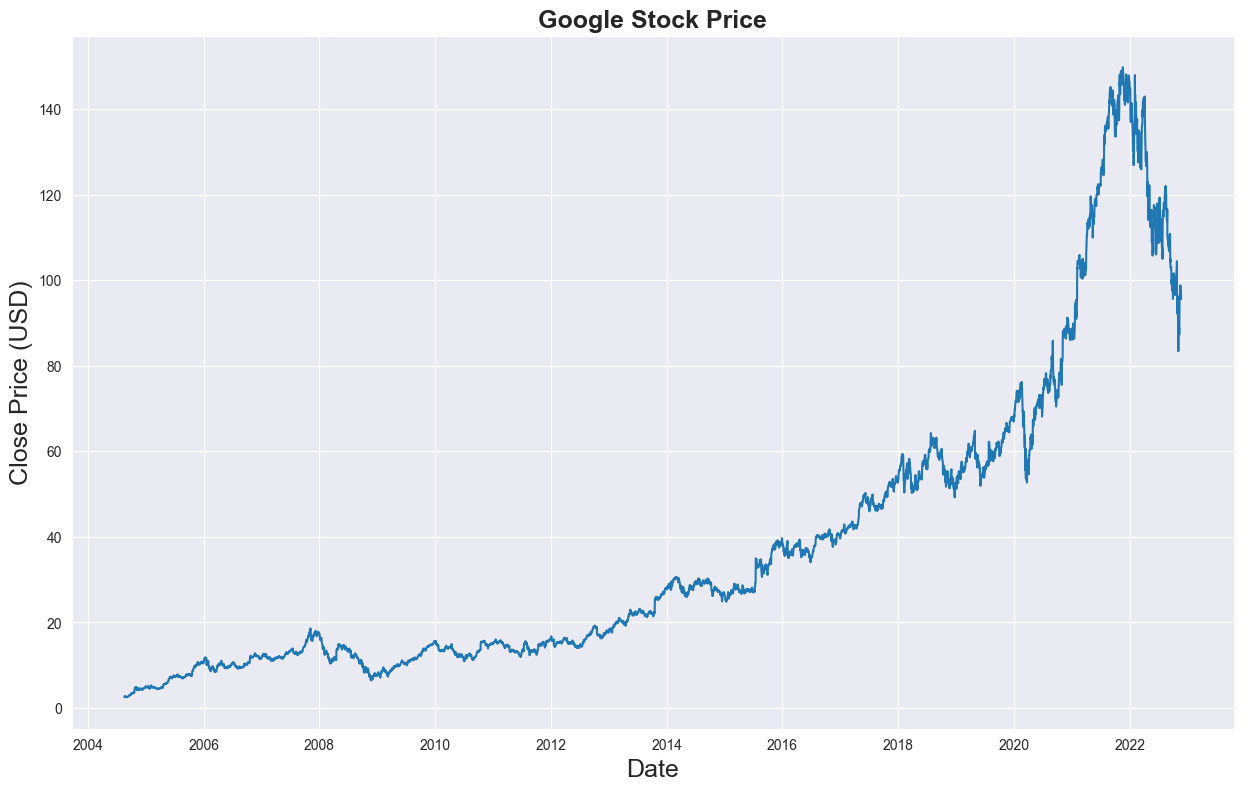

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 9))
plt.plot(df[['adjClose']])
plt.title("Google Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df['adjClose'] = scaler.fit_transform(np.array(df['adjClose']).reshape(-1, 1))
df_prices =df['adjClose'].values.reshape(-1,1)

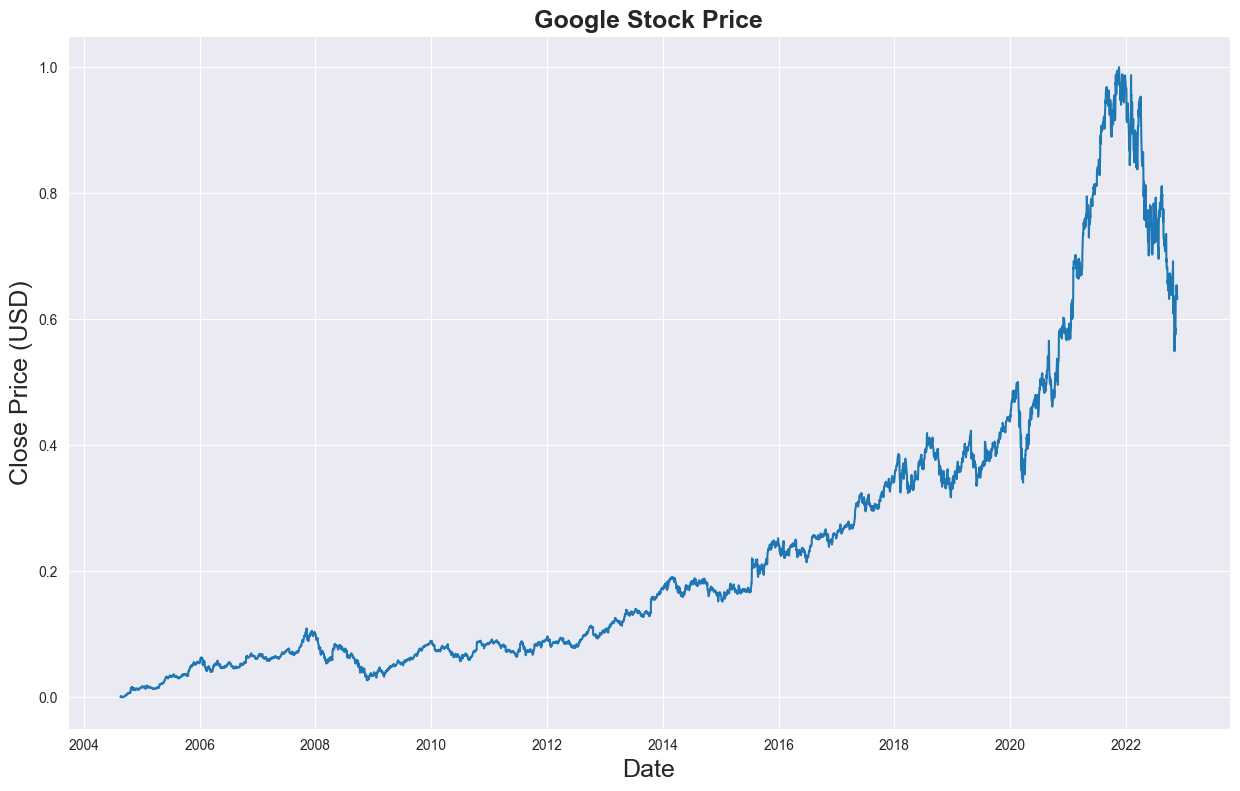

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 9))
plt.plot(df[['adjClose']])
plt.title("Google Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [14]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def torch_data(data, device):
    """Move data to a device"""
    return to_device(torch.from_numpy(data).type(torch.Tensor), device)

In [15]:
device = get_default_device()
device

device(type='cuda')

In [16]:
# convert an array of values into sequences according to window size
def create_sequence(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step -1):
		a = dataset.iloc[i:(i + time_step)]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step])
	return np.array(dataX), np.array(dataY)

In [17]:
# convert an array of values into a dataset matrix
def curate_dataset(dataset, time_step):

	##splitting dataset into train valid test split
	train_size = round(len(dataset) * 0.80)
	remaining_size = len(dataset) - train_size
	val_size = round(0.50 * remaining_size)
	train_data, val_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:(train_size + val_size), :], dataset.iloc[(train_size + val_size):len(dataset), :]

	X_train, y_train = create_sequence(train_data, time_step)
	X_val, y_val = create_sequence(val_data, time_step)
	X_test, y_test = create_sequence(test_data, time_step)
	
	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_val = y_val.reshape(y_val.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_val, X_test, y_train, y_val, y_test

In [18]:
# convert an array of values into a dataset matrix
def curate_dataset_test(dataset, time_step):

	##splitting dataset into train  test split
	train_size = round(len(dataset) * 0.90)
	train_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:, :]

	X_train, y_train = create_sequence(train_data, time_step)
	X_test, y_test = create_sequence(test_data, time_step)
	
	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_test, y_train, y_test

In [19]:
# Create a base (or vanilla) RNN Model
class RNN_base(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_base, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'tanh')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

In [20]:
def fit(num_epochs, lr, model, loss_type, opt_func, X_train, y_train):
    optimiser = opt_func(model.parameters(), lr)
    hist = np.zeros(num_epochs)
    start_time = time.time()
    for t in range(num_epochs):
        y_train_pred = model(X_train)
        loss = loss_type(y_train_pred, y_train)
        print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()       

        # Reset gradients
        optimiser.zero_grad()     

        # Compute gradients
        loss.backward()

        # Update parameters           
        optimiser.step()        
        
    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))
    print()
    
    return hist, y_train_pred

In [21]:
def plot_predictions(pred, true):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(12, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(x = true.index, y = true[0], label="Data", color='royalblue')
    ax = sns.lineplot(x = pred.index, y = pred[0], label="Training Prediction", color='tomato')
    ax.set_title('Stock price', size = 14, fontweight='bold')
    ax.set_xlabel("Days", size = 14)
    ax.set_ylabel("Cost (USD)", size = 14)
    ax.set_xticklabels('', size=10)

In [22]:
def plot_loss(history):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(8, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(data = history, color='royalblue')
    ax.set_xlabel("Epoch", size = 14)
    ax.set_ylabel("Loss", size = 14)
    ax.set_title("Training Loss", size = 14, fontweight='bold')

In [23]:
def plotly_predictions(results):  
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[0],
                        mode='lines',
                        name='Train prediction',
                        line = dict(color='#ff7f0e'))))
    fig.add_trace(go.Scatter(x=results['date'], y=results[1],
                        mode='lines',
                        name='Test prediction',
                        line = dict(color='#d62728')))
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[2],
                        opacity=0.6,
                        mode='lines',
                        name='Actual Value',
                        line = dict(color='#1f77b4'))))
    fig.update_layout(
        xaxis=dict(
            title_text='Dates',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        yaxis=dict(
            title_text='Close (USD)',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        showlegend=True,
        template = 'plotly_white'

    )

    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                xanchor='left', yanchor='bottom',
                                text='Results',
                                font=dict(family='Rockwell',
                                            size=26,
                                            color='black'),
                                showarrow=False))
    fig.update_layout(annotations=annotations)

    fig.show()

In [24]:
def evaluate_model_experiments(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_val, X_test, y_train, y_val, y_test = curate_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred

    original = scaler.inverse_transform(df_prices[0 : end_of_time]).reshape(-1, 1)    
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)

    #getting and appending the results to the results list
    metadata = [[time_step, model.layer_dim, model.hidden_dim, trainScore, valScore]]
    metadata = pd.DataFrame(metadata, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'])   
        
    return metadata

In [25]:
def evaluate_single_model(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_val, X_test, y_train, y_val, y_test = curate_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred

    original = scaler.inverse_transform(df_prices[0 : end_of_time]).reshape(-1, 1)    
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)    
    return None

In [26]:
def test_final_model(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_test, y_train, y_test = curate_dataset_test(df, time_step)
    X_train = torch_data(X_train, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_test_pred = model(X_test)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
    y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    testScore = math.sqrt(mean_squared_error(y_test, y_test_pred))
    print('Test Score: %.2f RMSE' % (testScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_test_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_test_pred

    original = scaler.inverse_transform(df_prices[0 : end_of_time]).reshape(-1, 1)    
    predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)    
    return None

## Vanilla RNN

Epoch  0 MSE:  0.030433885753154755
Epoch  1 MSE:  0.02525298297405243
Epoch  2 MSE:  0.02093934826552868
Epoch  3 MSE:  0.017493657767772675
Epoch  4 MSE:  0.01489782053977251
Epoch  5 MSE:  0.013108586892485619
Epoch  6 MSE:  0.012051287107169628
Epoch  7 MSE:  0.011616119183599949
Epoch  8 MSE:  0.011660431511700153
Epoch  9 MSE:  0.012020026333630085
Epoch  10 MSE:  0.012528907507658005
Epoch  11 MSE:  0.013041656464338303
Epoch  12 MSE:  0.013450528495013714
Epoch  13 MSE:  0.013692513108253479
Epoch  14 MSE:  0.013746736571192741
Epoch  15 MSE:  0.013625835999846458
Epoch  16 MSE:  0.013365116901695728
Epoch  17 MSE:  0.01301215123385191
Epoch  18 MSE:  0.012618015520274639
Epoch  19 MSE:  0.012230457738041878
Epoch  20 MSE:  0.011888918466866016
Epoch  21 MSE:  0.011621233075857162
Epoch  22 MSE:  0.011441925540566444
Epoch  23 MSE:  0.01135211531072855
Epoch  24 MSE:  0.011340995319187641
Epoch  25 MSE:  0.011388721875846386
Epoch  26 MSE:  0.011470366269350052
Epoch  27 MSE:  

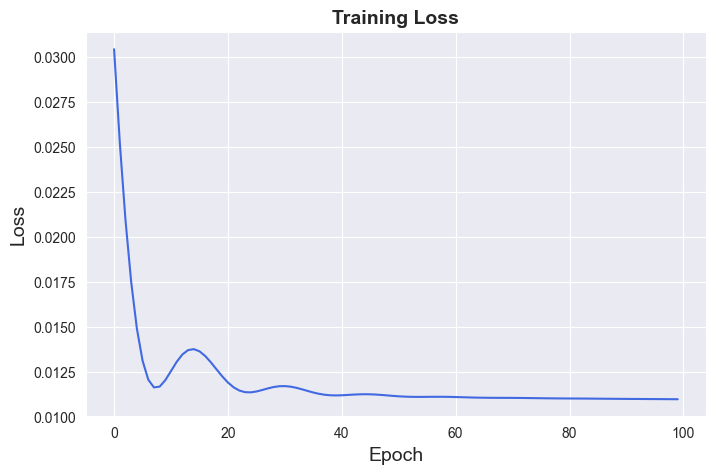

In [27]:
#parameters for vanilla RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(42)
vanilla_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
vanilla_rnn = to_device(vanilla_rnn, device)

#training and evaluating model
evaluate_single_model(vanilla_rnn, num_epochs, lr, loss_type, optimiser, time_step)

# Experiments with RNN

## Using ReLU as the non-linearity in RNN

In [28]:
# RNN model with relu as nonlinearity
class RNN_relu(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_relu, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

Epoch  0 MSE:  0.9098795056343079
Epoch  1 MSE:  0.6840399503707886
Epoch  2 MSE:  0.5115242600440979
Epoch  3 MSE:  0.3807930052280426
Epoch  4 MSE:  0.28236809372901917
Epoch  5 MSE:  0.2086741030216217
Epoch  6 MSE:  0.15378399193286896
Epoch  7 MSE:  0.11313112080097198
Epoch  8 MSE:  0.08323177695274353
Epoch  9 MSE:  0.06144329905509949
Epoch  10 MSE:  0.04576566070318222
Epoch  11 MSE:  0.03468523174524307
Epoch  12 MSE:  0.027054699137806892
Epoch  13 MSE:  0.02200216054916382
Epoch  14 MSE:  0.01886310987174511
Epoch  15 MSE:  0.017129721119999886
Epoch  16 MSE:  0.01641298457980156
Epoch  17 MSE:  0.016414500772953033
Epoch  18 MSE:  0.016905399039387703
Epoch  19 MSE:  0.017710460349917412
Epoch  20 MSE:  0.01869610697031021
Epoch  21 MSE:  0.019761348143219948
Epoch  22 MSE:  0.020830728113651276
Epoch  23 MSE:  0.021848957985639572
Epoch  24 MSE:  0.022776732221245766
Epoch  25 MSE:  0.02358737587928772
Epoch  26 MSE:  0.024264268577098846
Epoch  27 MSE:  0.024798708036541

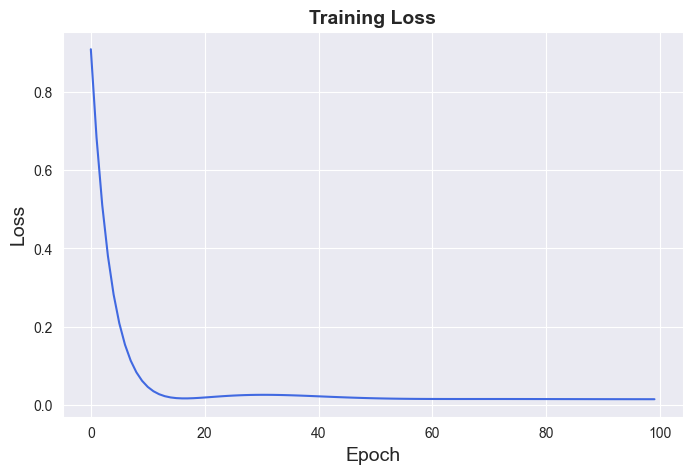

In [29]:
#parameters for RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(42)
relu_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
relu_rnn = to_device(relu_rnn, device)

#training and evaluating model
evaluate_single_model(relu_rnn, num_epochs, lr, loss_type, optimiser, time_step)

In [30]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

tanh_results = []
relu_results = []
for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the tanh RNN model
            torch.manual_seed(42)
            tanh_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            tanh_rnn = to_device(tanh_rnn, device)
            #training and evaluating model
            tanh_res = evaluate_model_experiments(tanh_rnn, num_epochs, lr, loss_type, optimiser, time_step)
            tanh_results += [tanh_res.iloc[0]]
            print()

            #declaring the tanh RNN model
            relu_rnn_exp = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            relu_rnn_exp = to_device(relu_rnn_exp, device)
            #training and evaluating model
            relu_res = evaluate_model_experiments(relu_rnn_exp, num_epochs, lr, loss_type, optimiser, time_step)
            relu_results += [relu_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1

Epoch  0 MSE:  0.28549546003341675
Epoch  1 MSE:  0.24882616102695465
Epoch  2 MSE:  0.21499194204807281
Epoch  3 MSE:  0.1840364634990692
Epoch  4 MSE:  0.15595175325870514
Epoch  5 MSE:  0.13068406283855438
Epoch  6 MSE:  0.10814294964075089
Epoch  7 MSE:  0.08821169286966324
Epoch  8 MSE:  0.07075892388820648
Epoch  9 MSE:  0.05564926564693451
Epoch  10 MSE:  0.04275136440992355
Epoch  11 MSE:  0.031942177563905716
Epoch  12 MSE:  0.023106688633561134
Epoch  13 MSE:  0.01613333448767662
Epoch  14 MSE:  0.010906174778938293
Epoch  15 MSE:  0.007295010145753622
Epoch  16 MSE:  0.005145474802702665
Epoch  17 MSE:  0.0042709228582680225
Epoch  18 MSE:  0.00444858567789197
Epoch  19 MSE:  0.005422278773039579
Epoch  20 MSE:  0.006913309451192617
Epoch  21 MSE:  0.00863946694880724
Epoch  22 MSE:  0.010339325293898582
Epoch  23 MSE:  0.01179661974310875
Epoch  24 MSE:  0.012858554720878601
Epoch  25 MSE:  0.013443943113088608
Epoch  26 

In [31]:
tanh_results = pd.DataFrame(tanh_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)
relu_results = pd.DataFrame(relu_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [32]:
tanh_results = tanh_results.sort_values('valScore', ascending=True, ignore_index = True)  
tanh_results

,time_step,num_layers,hidden_dim,trainScore,valScore
0,30.0,2.0,4.0,0.985911,1.607537
1,50.0,2.0,4.0,0.982609,1.609032
2,20.0,1.0,4.0,0.794852,1.633947
3,30.0,1.0,4.0,0.795661,1.636398
4,20.0,2.0,4.0,0.988363,1.637064
5,100.0,2.0,4.0,0.974233,1.648833
6,50.0,1.0,4.0,0.798528,1.670495
7,100.0,1.0,4.0,0.810000,1.760130
8,20.0,1.0,8.0,0.574812,2.349471
9,30.0,1.0,8.0,0.575830,2.371308


In [33]:
relu_results = relu_results.sort_values('valScore', ascending=True, ignore_index = True)
relu_results

,time_step,num_layers,hidden_dim,trainScore,valScore
0,50.0,1.0,32.0,0.748928,1.550440
1,30.0,1.0,32.0,0.540050,1.754640
2,100.0,1.0,32.0,0.534884,1.982425
3,20.0,1.0,32.0,0.468360,2.125652
4,20.0,2.0,16.0,0.574216,2.343135
5,20.0,1.0,16.0,0.653668,3.653066
6,20.0,2.0,32.0,0.643773,3.811140
7,30.0,1.0,16.0,0.671954,3.928917
8,100.0,1.0,16.0,0.904023,3.961056
9,50.0,1.0,16.0,0.849131,3.977182


In [34]:
best_model = relu_results.iloc[0]
best_model

time_step     50.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.748928
valScore       1.550440
Name: 0, dtype: float64

Epoch  0 MSE:  0.01681612990796566
Epoch  1 MSE:  0.015055704861879349
Epoch  2 MSE:  0.013315045274794102
Epoch  3 MSE:  0.010100333020091057
Epoch  4 MSE:  0.010174346156418324
Epoch  5 MSE:  0.010370596311986446
Epoch  6 MSE:  0.009178292006254196
Epoch  7 MSE:  0.007952612824738026
Epoch  8 MSE:  0.007850434631109238
Epoch  9 MSE:  0.00756398681551218
Epoch  10 MSE:  0.006185248494148254
Epoch  11 MSE:  0.005707019008696079
Epoch  12 MSE:  0.005453044548630714
Epoch  13 MSE:  0.004289013333618641
Epoch  14 MSE:  0.0037676957435905933
Epoch  15 MSE:  0.0030324729159474373
Epoch  16 MSE:  0.0016907856334000826
Epoch  17 MSE:  0.0015085365157574415
Epoch  18 MSE:  0.00022588622232433408
Epoch  19 MSE:  0.0007851036498323083
Epoch  20 MSE:  0.0006235241889953613
Epoch  21 MSE:  0.0010297545231878757
Epoch  22 MSE:  0.0011129197664558887
Epoch  23 MSE:  0.0007577657816000283
Epoch  24 MSE:  0.0003611491993069649
Epoch  25 MSE:  0.00027595629217103124
Epoch  26 MSE:  8.749894914217293e-0

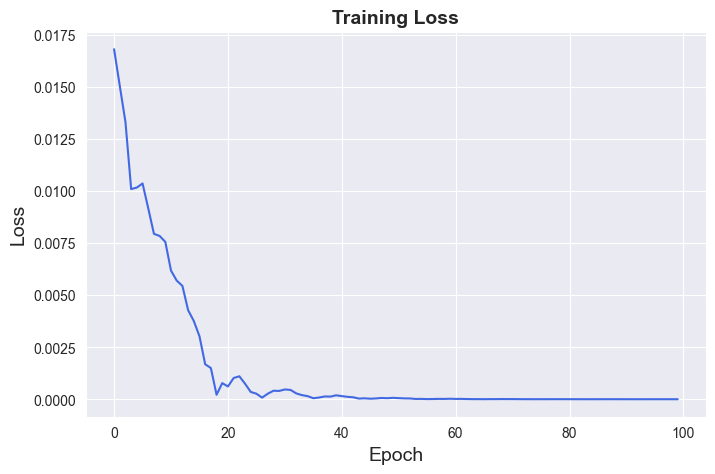

In [35]:
# Retraining our model with tuned parameters

#constant parameters as used in a vanilla RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_model['hidden_dim'])
num_layers = int(best_model['num_layers'])
time_step = int(best_model['time_step'])

#declaring the model
torch.manual_seed(42)
tuned_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_rnn = to_device(tuned_rnn, device)

#training and evaluating model
evaluate_single_model(tuned_rnn, num_epochs, lr, loss_type, optimiser, time_step)

# LSTM Model

In [36]:
class LSTM_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTM_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [37]:
gc.collect()
torch.cuda.empty_cache()

Epoch  0 MSE:  0.04304641857743263
Epoch  1 MSE:  0.0184324998408556
Epoch  2 MSE:  0.009740835055708885
Epoch  3 MSE:  0.012938111089169979
Epoch  4 MSE:  0.01544227171689272
Epoch  5 MSE:  0.013033723458647728
Epoch  6 MSE:  0.010330738499760628
Epoch  7 MSE:  0.009081490337848663
Epoch  8 MSE:  0.009062462486326694
Epoch  9 MSE:  0.009582322090864182
Epoch  10 MSE:  0.010050307959318161
Epoch  11 MSE:  0.010167275555431843
Epoch  12 MSE:  0.00989293958991766
Epoch  13 MSE:  0.009334404021501541
Epoch  14 MSE:  0.00865420326590538
Epoch  15 MSE:  0.008011788129806519
Epoch  16 MSE:  0.007527488283813
Epoch  17 MSE:  0.00725758308544755
Epoch  18 MSE:  0.007177040446549654
Epoch  19 MSE:  0.007179119624197483
Epoch  20 MSE:  0.007109316997230053
Epoch  21 MSE:  0.006836924236267805
Epoch  22 MSE:  0.006328259594738483
Epoch  23 MSE:  0.005664474796503782
Epoch  24 MSE:  0.004985890816897154
Epoch  25 MSE:  0.004402374383062124
Epoch  26 MSE:  0.0039169504307210445
Epoch  27 MSE:  0.00

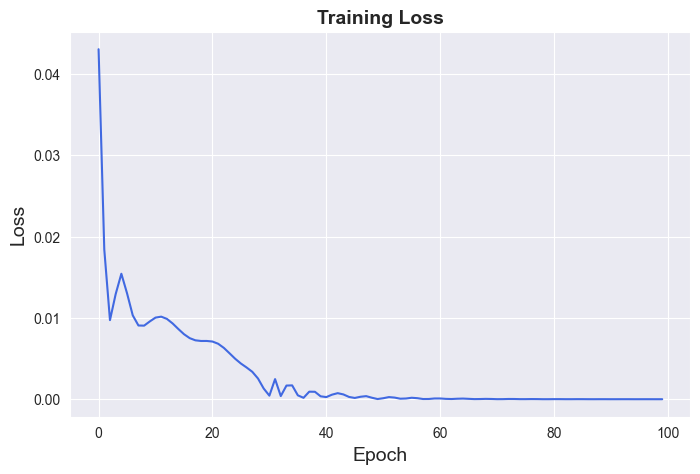

In [38]:
#parameters
input_dim = 1
hidden_dim = 32
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam
time_step = 50

#declaring the model
torch.manual_seed(42)
lstm_1 = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
lstm_1 = to_device(lstm_1, device)

#training and evaluating model
evaluate_single_model(lstm_1, num_epochs, lr, loss_type, optimiser, time_step)

# GRU

In [39]:
class GRU_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(GRU_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [40]:
gc.collect()
torch.cuda.empty_cache()

Epoch  0 MSE:  0.028337107971310616
Epoch  1 MSE:  0.01032582949846983
Epoch  2 MSE:  0.014605163596570492
Epoch  3 MSE:  0.015259894542396069
Epoch  4 MSE:  0.011684221215546131
Epoch  5 MSE:  0.009053640998899937
Epoch  6 MSE:  0.008365293964743614
Epoch  7 MSE:  0.008766367100179195
Epoch  8 MSE:  0.009130315855145454
Epoch  9 MSE:  0.008797085843980312
Epoch  10 MSE:  0.0077573745511472225
Epoch  11 MSE:  0.006416999269276857
Epoch  12 MSE:  0.005289038177579641
Epoch  13 MSE:  0.004739338997751474
Epoch  14 MSE:  0.004718360956758261
Epoch  15 MSE:  0.004621850326657295
Epoch  16 MSE:  0.003797534853219986
Epoch  17 MSE:  0.002387303626164794
Epoch  18 MSE:  0.0012979881139472127
Epoch  19 MSE:  0.0012141618644818664
Epoch  20 MSE:  0.001342449220828712
Epoch  21 MSE:  0.0005154699902050197
Epoch  22 MSE:  0.00037275778595358133
Epoch  23 MSE:  0.001764290384016931
Epoch  24 MSE:  0.0009580970508977771
Epoch  25 MSE:  0.0003836883988697082
Epoch  26 MSE:  0.0006682375096715987
Epo

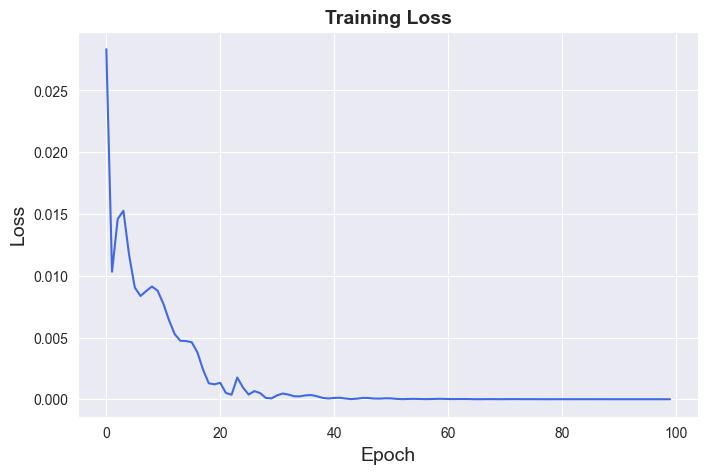

In [41]:
input_dim = 1
hidden_dim = 32
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
time_step = 50
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#declaring the model
torch.manual_seed(42)
gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
gru = to_device(gru, device)

#training and evaluating model
evaluate_single_model(gru, num_epochs, lr, loss_type, optimiser, time_step)

Epoch  0 MSE:  0.04690510779619217
Epoch  1 MSE:  0.020442720502614975
Epoch  2 MSE:  0.020456749945878983
Epoch  3 MSE:  0.023950057104229927
Epoch  4 MSE:  0.02028132788836956
Epoch  5 MSE:  0.015736570581793785
Epoch  6 MSE:  0.01329843234270811
Epoch  7 MSE:  0.012772835791110992
Epoch  8 MSE:  0.012857645750045776
Epoch  9 MSE:  0.01220378465950489
Epoch  10 MSE:  0.010235927999019623
Epoch  11 MSE:  0.007391736377030611
Epoch  12 MSE:  0.004889907315373421
Epoch  13 MSE:  0.004071590956300497
Epoch  14 MSE:  0.004485882353037596
Epoch  15 MSE:  0.003184942062944174
Epoch  16 MSE:  0.0005055160145275295
Epoch  17 MSE:  0.00064291269518435
Epoch  18 MSE:  0.0030794828198850155
Epoch  19 MSE:  0.002559635089710355
Epoch  20 MSE:  0.0009859733982011676
Epoch  21 MSE:  0.0011109818005934358
Epoch  22 MSE:  0.0011978110997006297
Epoch  23 MSE:  0.00053397286683321
Epoch  24 MSE:  0.00015566406364087015
Epoch  25 MSE:  0.00035834385198540986
Epoch  26 MSE:  0.0007538472418673337
Epoch  

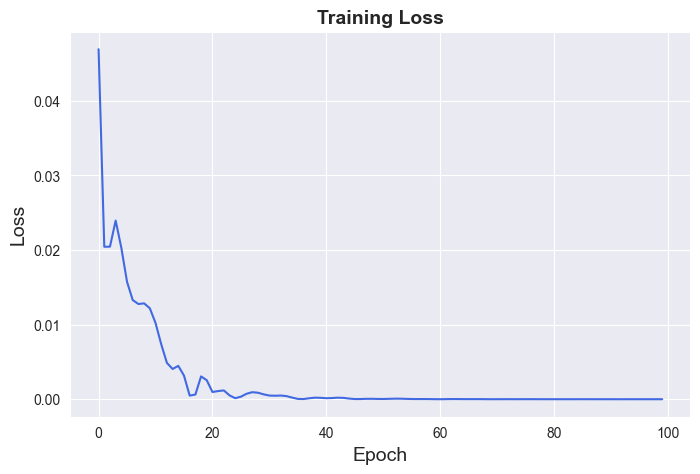

In [42]:
input_dim = 1
hidden_dim = 32
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
time_step = 50
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#declaring the model
torch.manual_seed(42)
final_model = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
final_model = to_device(final_model, device)

#training and evaluating model
test_final_model(final_model, num_epochs, lr, loss_type, optimiser, time_step)

Visit https://nbviewer.org/github/Satpat/Sequential-networks-for-Stonks/blob/main/final_code_git.ipynb for viewing plotly graphs which plot the predictions.